## Paper Statistics

This notebooks prints and plots some general stats about the number of Fight for Sight publications and the number of citations they have. Plots and spreadsheets of the results are saved to the data/EPMC folder.

The notebook can be customised in two ways - by defining which years to consider, and how to group different numbers of citations. These can be edited in the "Year Range to Investigate" and "How to Group Number of Citations" sections below.

To run the notebook go to Kernel -> Restart and Run All.

### Year Range to Investigate

In [1]:
START_YEAR = 1990
END_YEAR = 2020

In [2]:
import math
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import re

df = pd.read_pickle('data/EPMC/ffs_papers.pkl')
df.set_index('pmid',inplace=True)
df = df[~df.index.isnull()]

df['firstPublicationDate'] = pd.to_datetime(df['firstPublicationDate'])
df['pubYear'] = df['firstPublicationDate'].dt.year.astype(int)

print('In total there are '+str(len(df))+' Fight for Sight papers.')

df = df[(df['pubYear']>=START_YEAR) & (df['pubYear']<=END_YEAR)]

print('Between',START_YEAR,'and',END_YEAR,'there are',len(df),'papers.')

In total there are 1572 Fight for Sight papers.
Between 1990 and 2020 there are 1572 papers.


### How to Group Number of Citations

CITATION_GROUPS should be a comma separated list of numbers between square brackets (i.e. a python list). By default it is [0.5, 3.5, 7.5, 17.5], which will group the number of citations in to:

* 0 citations (0 to 0.5)
* 1 to 3 citations (0.5 to 3.5)
* 4 to 7 citations (3.5 to 7.5)
* 8 to 17 citations (7.5 to 17.5)
* More than 17 citations (above 17.5)

In [3]:
CITATION_GROUPS = [0.5, 3.5, 7.5, 17.5]

In [4]:
CITATION_LABELS=[]
for i in range(len(CITATION_GROUPS)+1):
    if i==0:
        start = 0
    else:
        start = math.ceil(CITATION_GROUPS[i-1])
        
    if i<len(CITATION_GROUPS):
        end = math.floor(CITATION_GROUPS[i])
    
    if start==end:
        CITATION_LABELS.append(str(start))    
    elif i==len(CITATION_GROUPS):
        CITATION_LABELS.append('More than '+str(math.floor(CITATION_GROUPS[i-1])))
    else:
        CITATION_LABELS.append(str(start) + ' to ' + str(end))
    
CITATION_GROUPS = [-0.5] + CITATION_GROUPS + [9999999]

print('The defined citation groups are:')
print(CITATION_LABELS)

The defined citation groups are:
['0', '1 to 3', '4 to 7', '8 to 17', 'More than 17']


### Number of Publications per Year

In [5]:
def plot_save_bar(series, save_name, save_dir,
                  figsize=(20,9), dpi=300,
                  horizontal=False,stacked=False,
                  xlabel='',ylabel='',title='',legend=None,
                  color='#77b800',fontsize=24, rot=30):

    series.to_excel(save_dir+'/'+save_name+'.xlsx')
    
    ax = plt.figure(figsize=figsize).gca()
    
    if horizontal:
        if color is None:
            series.plot.barh(stacked=stacked,rot=rot,fontsize=fontsize,ax=ax)
        else:
            series.plot.barh(stacked=stacked,color=color,rot=rot,fontsize=fontsize,ax=ax)
    else:
        if color is None:
            series.plot.bar(stacked=stacked,rot=rot,fontsize=fontsize,ax=ax)
        else:
            series.plot.bar(stacked=stacked,color=color,rot=rot,fontsize=fontsize,ax=ax)
    
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.title(title,fontsize=fontsize)    
    if legend is not None:
        plt.legend(legend,fontsize=fontsize)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.tight_layout()
    
    plt.savefig(save_dir+'/'+save_name+'.png',dpi=dpi)

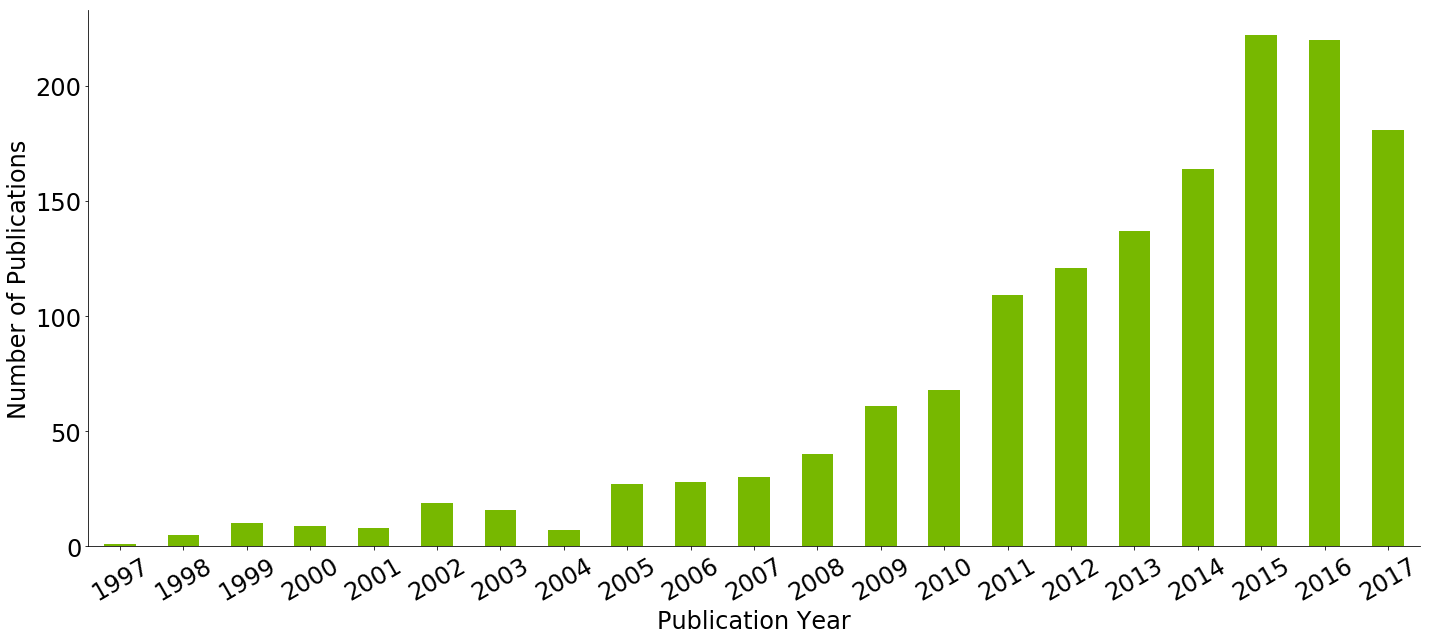

In [6]:
plot_save_bar(df[df.pubYear<2018].groupby('pubYear').pubYear.count(),
              xlabel='Publication Year',ylabel='Number of Publications',
              save_name='ffs_pub_per_year', save_dir='plots/epmc')

### Most Recent Publications

In [13]:
with pd.option_context('display.max_colwidth', -1):
    display(df[['firstPublicationDate','title']].sort_values(by='firstPublicationDate',ascending=False).head(10))

,firstPublicationDate,title
pmid,,
30315276,2018-10-12,Disrupted alternative splicing for genes implicated in splicing and ciliogenesis causes PRPF31 retinitis pigmentosa.
30336354,2018-10-09,Monoamine oxidase-A promotes protective autophagy in human SH-SY5Y neuroblastoma cells through Bcl-2 phosphorylation.
30297895,2018-10-08,Beneficial effects on vision in patients undergoing retinal gene therapy for choroideremia.
30288945,2018-10-05,Anatomic Studies of the Miniature Swine Cornea.
30347075,2018-10-01,Clinical Features of a Retinopathy Associated With a Dominant Allele of the RGR Gene.
30224384,2018-10-01,Modulation of three key innate immune pathways for the most common retinal degenerative diseases.
30014472,2018-09-19,Heat shock proteins are differentially expressed in brain and spinal cord: implications for multiple sclerosis.
30223810,2018-09-17,Schnyder corneal dystrophy and associated phenotypes caused by novel and recurrent mutations in the UBIAD1 gene.
30213993,2018-09-13,Microwave treatment of the cornea leads to localised disruption of the extracellular matrix.


### Number of Citations - General Stats

In [7]:
fraction_cited = (df['citedByCount']>0).value_counts(normalize=True)
print('Fraction of Papers with at Least One Citation: {:.0%}.'.format(fraction_cited[True]))
print('Mean Number of Citations: {:.0f}.'.format(df['citedByCount'].mean()))
print('Median Number of Citations: {:.0f}.'.format(df['citedByCount'].median()))
print('Maximum Number of Citations: {:.0f}.'.format(df['citedByCount'].max()))

Fraction of Papers with at Least One Citation: 90%.
Mean Number of Citations: 22.
Median Number of Citations: 8.
Maximum Number of Citations: 3155.


### Papers with Most Citations

In [8]:
with pd.option_context('display.max_colwidth', -1):
    # top 10 papers with most citations
    display(df[['citedByCount','title']].sort_values(by='citedByCount',ascending=False).head(10))

,citedByCount,title
pmid,,
23245609,3155,"A comparative risk assessment of burden of disease and injury attributable to 67 risk factors and risk factor clusters in 21 regions, 1990-2010: a systematic analysis for the Global Burden of Disease Study 2010."
17051153,300,Corneal avascularity is due to soluble VEGF receptor-1.
15558062,285,Light-activated ion channels for remote control of neuronal firing.
22108672,275,Normalization as a canonical neural computation.
24217912,273,The Human Phenotype Ontology project: linking molecular biology and disease through phenotype data.
16452172,253,Drusen complement components C3a and C5a promote choroidal neovascularization.
12727870,240,A conserved ER targeting motif in three families of lipid binding proteins and in Opi1p binds VAP.
24439297,225,Retinal gene therapy in patients with choroideremia: initial findings from a phase 1/2 clinical trial.
15153612,222,Characterization of putative stem cell phenotype in human limbal epithelia.


### Publications Grouped by Number of Citations

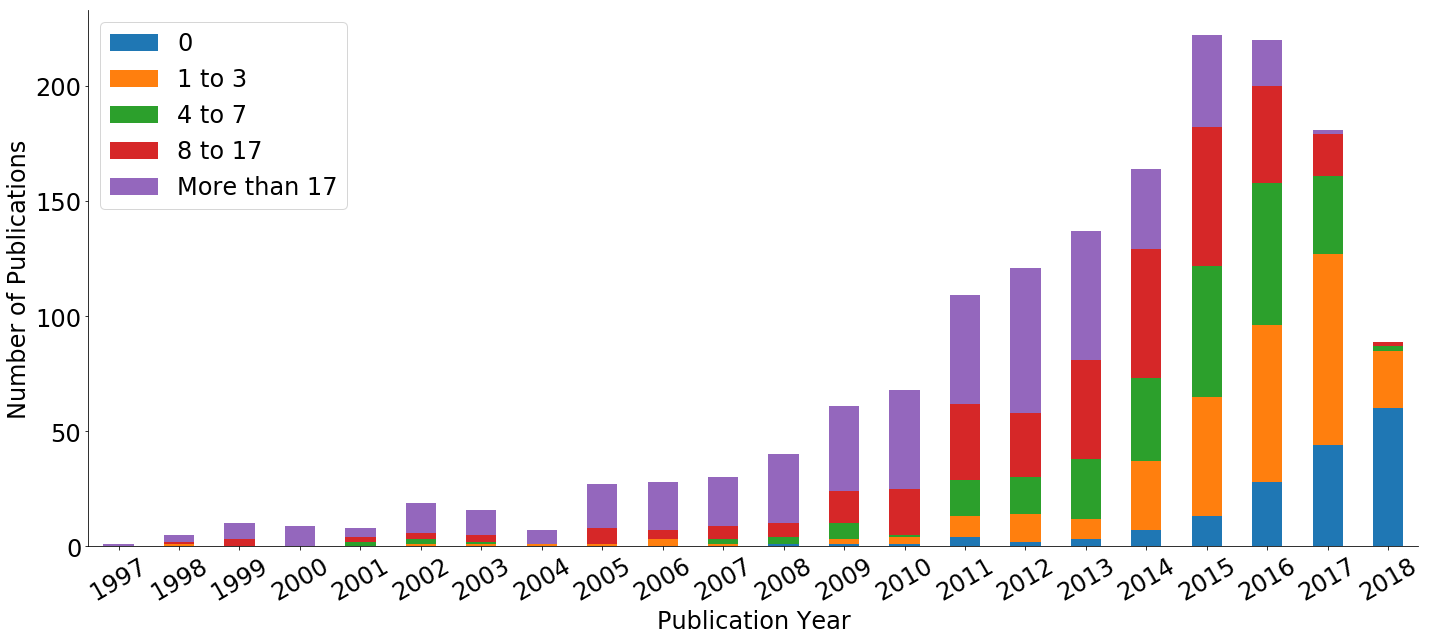

In [9]:
cited_bins = pd.cut(df['citedByCount'],[-0.5, 0.5, 3.5, 7.5, 17.5, 9999999], labels=['0','1 to 3','4 to 7','8 to 17','More than 17'])
to_plot = cited_bins.groupby(df['pubYear']).value_counts(sort=False).unstack(fill_value=0)

plot_save_bar(to_plot,
              xlabel='Publication Year',ylabel='Number of Publications',
              save_name='ffs_citations_per_year', save_dir='plots/epmc', legend=CITATION_LABELS,
              color=None,stacked=True)

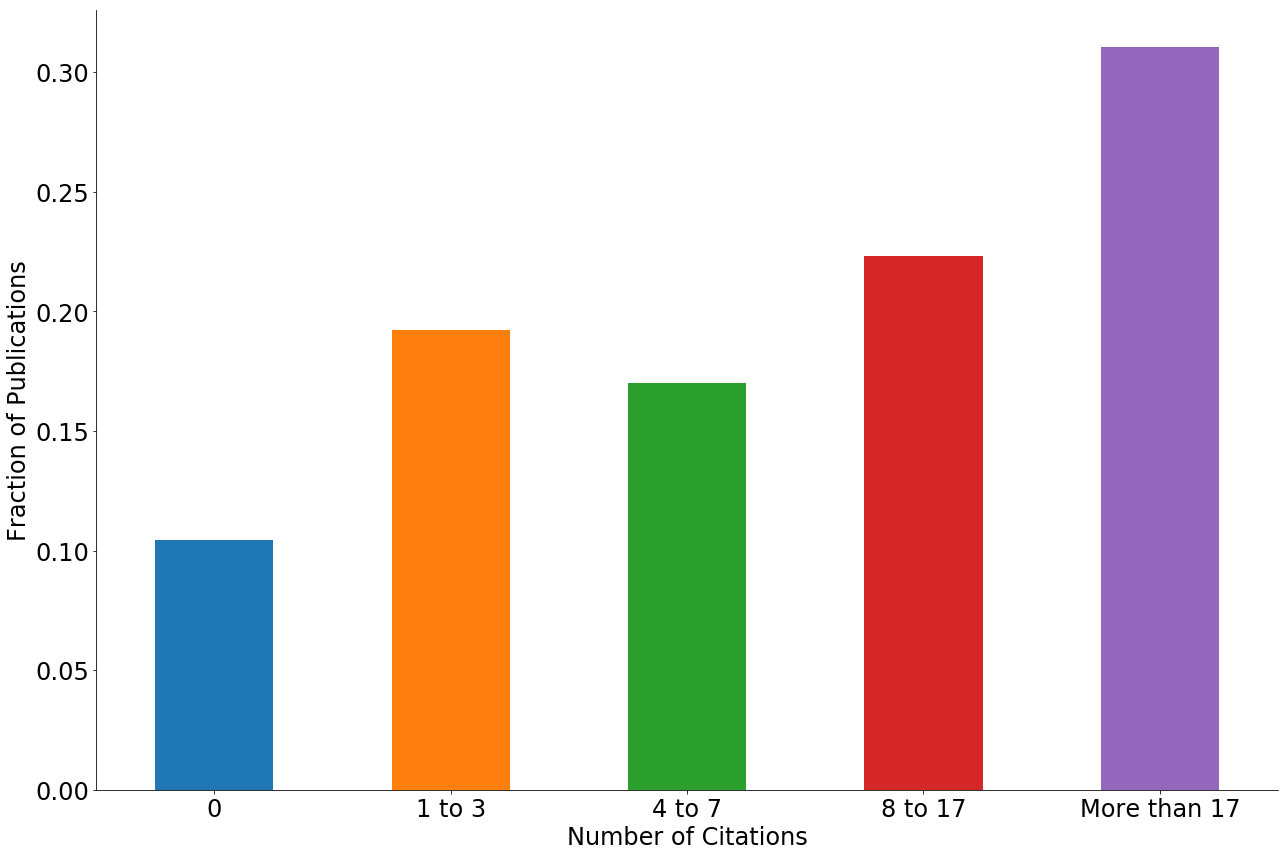

In [10]:
plot_save_bar(cited_bins.value_counts(normalize=True,sort=False),
              figsize=(18,12),
              xlabel='Number of Citations',ylabel='Fraction of Publications',
              save_name='ffs_citation_groups', save_dir='plots/epmc',
              color=None, rot=0)

### By Grant Number

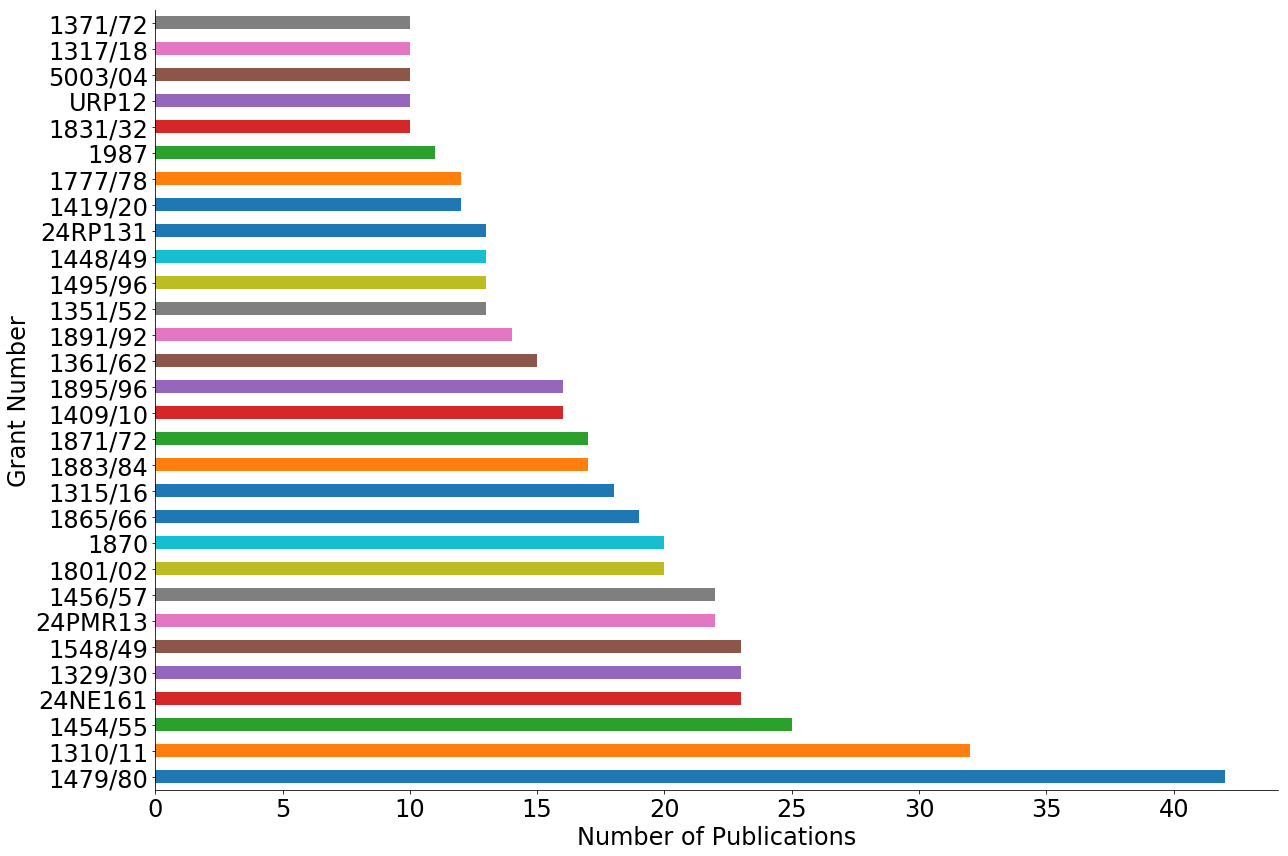

In [11]:
def get_ffs_grant_ids(grantsList):
    if type(grantsList) is list:
        ids = [grant['grantId'] for grant in grantsList if 'Fight for Sight' in grant['agency']]
        
        if len(ids)==0:
            ids = np.nan
    else:
        ids = np.nan
    
    return ids

df['FFS_IDs'] = df['grantsList'].apply(get_ffs_grant_ids)
grant_counts = pd.Series([grant for grant_list in df['FFS_IDs'].dropna() for grant in grant_list])
grant_counts = grant_counts.value_counts()

plot_save_bar(grant_counts.head(30),
              figsize=(18,12), horizontal=True,
              xlabel='Number of Publications',ylabel='Grant Number',
              save_name='ffs_citation_groups', save_dir='plots/epmc',
              color=None, rot=0)

### By Funding Agency

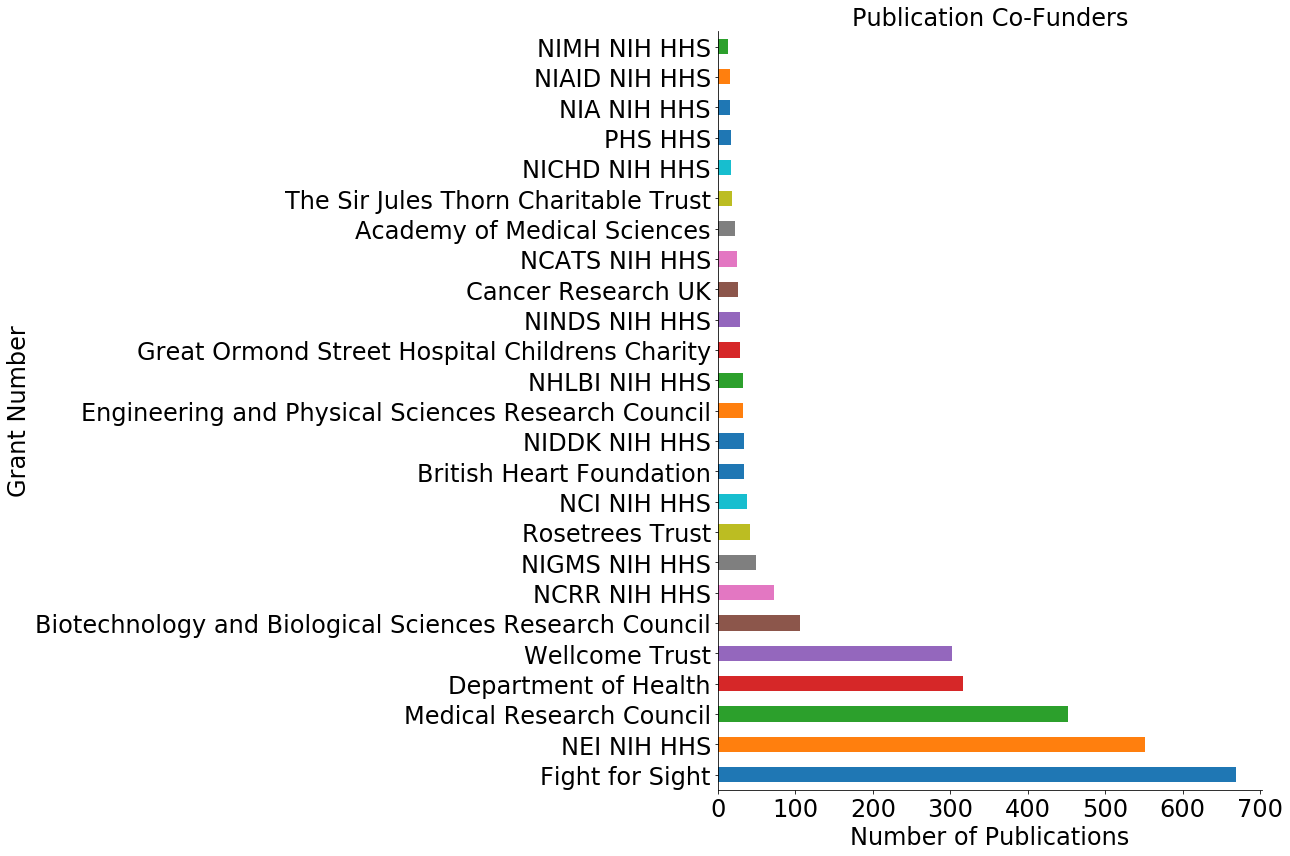

In [12]:
def get_grant_agencies(grantsList):
    if type(grantsList) is list:
        agencies = [grant['agency'] for grant in grantsList]
        agencies = list(set(agencies))        
        if len(agencies)==0:
            agencies = np.nan
    else:
        agencies = np.nan
    return agencies

df['funding_agencies'] = df['grantsList'].apply(get_grant_agencies)

agency_counts = pd.Series([grant for grant_list in df['funding_agencies'].dropna() for grant in grant_list])
agency_counts = agency_counts.value_counts()

plot_save_bar(agency_counts.head(25),
              figsize=(18,12), horizontal=True,
              xlabel='Number of Publications',ylabel='Grant Number',
              save_name='ffs_other_agencies', save_dir='plots/epmc',
              title='Publication Co-Funders',
              color=None, rot=0)